# Algoritmos No Supervisados
Pruebe combinar reducción de dimensionalidad con Agrupación  
Implemente lo siguiente:
- PCA y MCA
- KMEANS, DBSCAN, JERÁRQUICO
- Evaluar usando gráfico de la silueta
- Mostrar a la clase su proceso

**Profesor**: Bernal Rojas V.  
**Estudiante**: Natalia Bonilla V.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


## 1. Algoritmos de Reducción de dimensionalidad

In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

### 1.1 Analisis de componentes principales (PCA)

In [ ]:
X = df.drop('liked', axis=1)
y = df['liked']

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Crear un objeto PCA y ajustar los datos
pca = PCA() #(n_components=2)  # Reducir a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

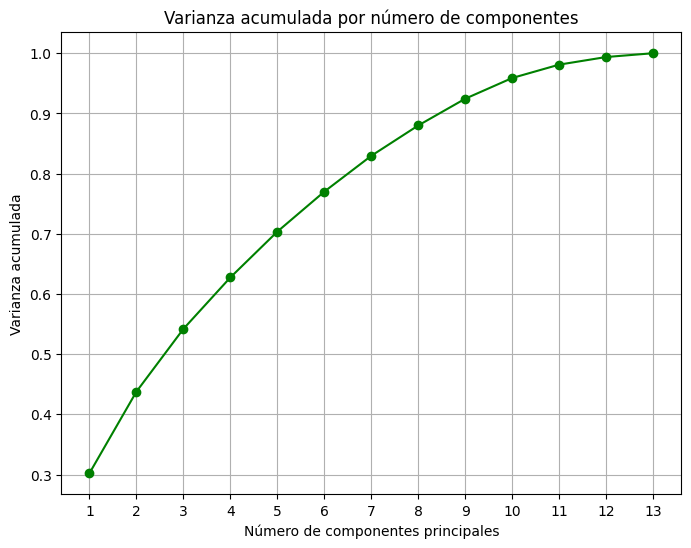

In [ ]:
#Graficar la varianza acumulada por componente. Este gráfico permite identificar la cantida de componentes ideal y que expliquen la mayor varianza posible.
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='-', color='green')
plt.title('Varianza acumulada por número de componentes')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

In [ ]:
#Aplicar el PCA con la cantidad de componentes con la mayor cantida de varianza explicada
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca.explained_variance_ratio_

array([0.30214539, 0.1355521 , 0.10422405, 0.08554873, 0.07608077,
       0.06646312])

In [ ]:
print(pca.explained_variance_ratio_.sum()*100)

77.00141613224841


In [ ]:
# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca['target'] = y

In [ ]:
#Mostrar nuevo dataframe
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,target
0,0.093601,-0.241054,2.113660,0.136476,-0.723587,0.528748,0
1,1.326010,-0.263836,0.662646,-1.730637,0.619653,-0.062313,1
2,-5.522543,-1.423436,-0.097851,0.939667,-0.359747,-0.856922,0
3,0.251064,-0.152340,0.896308,0.417238,-1.432637,-0.111722,1
4,1.394615,-1.143547,-0.849049,0.806159,0.574271,-0.679346,1


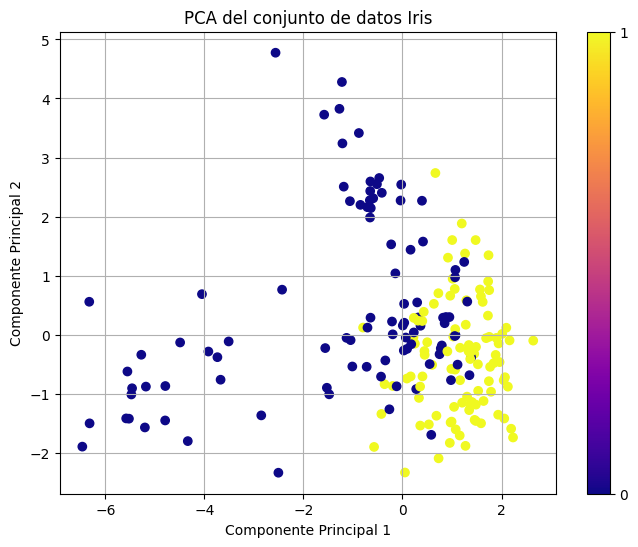

In [ ]:
# Graficar las componentes principales
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='plasma')
plt.title('PCA del conjunto de datos Iris')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, ticks=[0, 1, 2])
plt.grid()
plt.show()

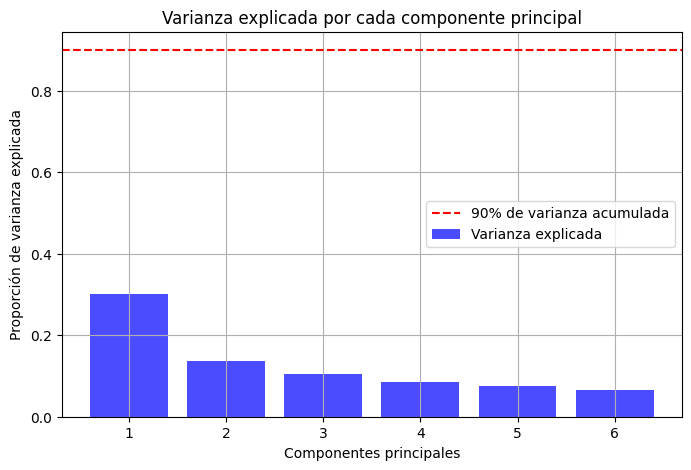

In [ ]:
# varianza explicada
explained_variance = pca.explained_variance_ratio_

# Gráfico de varianza explicada
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label='Varianza explicada')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por cada componente principal')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de varianza acumulada')
plt.legend()
plt.show()

### 1.2 Analisis de correspondencias multiples (MCA)

In [ ]:
!pip install prince

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [ ]:
import prince

In [ ]:
# Crear un objeto de ACM y ajustar los datos
acm = prince.MCA(n_components=2)
acm = acm.fit(df)

In [ ]:
# Transformar los datos
transformed_data = acm.transform(df)

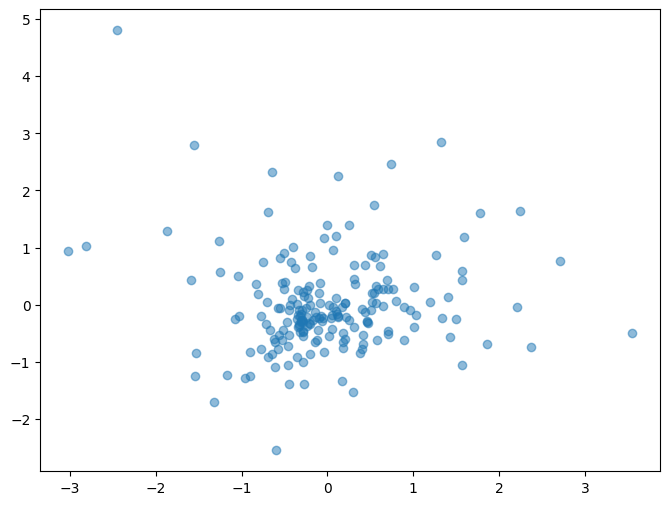

In [ ]:
# Graficar las componentes
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[0], transformed_data[1], alpha=0.5)

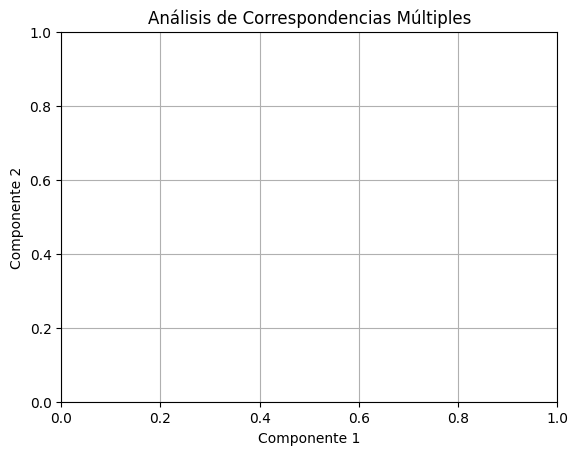

In [ ]:
# Añadir etiquetas
#for i, txt in enumerate(df.index):
#plt.annotate(txt, (transformed_data[0][i], transformed_data[1][i]))

plt.title('Análisis de Correspondencias Múltiples')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

In [ ]:
# Obtener contribuciones
contributions = acm.eigenvalues_ / acm.eigenvalues_.sum()

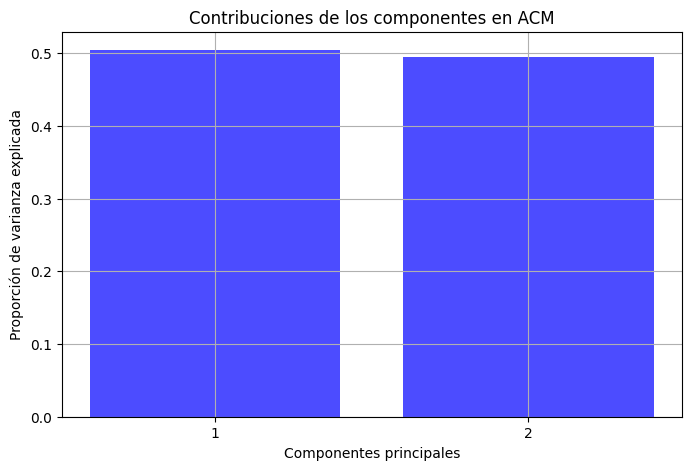

In [ ]:
# Graficar las contribuciones
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(contributions) + 1), contributions, alpha=0.7, color='blue', label='Contribución')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Contribuciones de los componentes en ACM')
plt.xticks(range(1, len(contributions) + 1))
plt.grid()
plt.show()

In [ ]:
contributions

array([0.50457903, 0.49542097])

## 2. Algoritmos de agrupación

### 2.1 KMEANS

In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

In [ ]:
from sklearn.cluster import KMeans #K-means library
#X = df.drop('liked', axis=1)
#y = df['liked']

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Calcular la inercia para diferentes números de clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [ ]:
#solo para que al cambiarlo sea mas rapido
num_clusters = 3

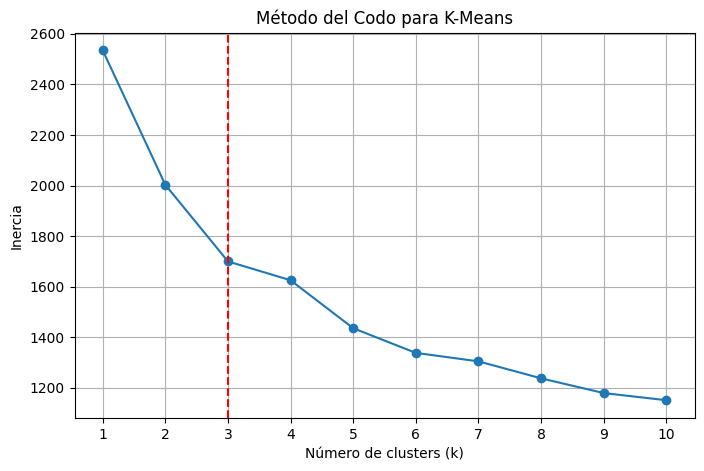

In [ ]:
# Graficar el resultado
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid()
plt.axvline(x=num_clusters, color='r', linestyle='--')  # Línea vertical para el número óptimo de clusters
plt.show()

In [ ]:
# Ajustar K-Means con el número óptimo de clusters
optimal_k = num_clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Obtener las etiquetas de los clusters
labels = kmeans_optimal.labels_

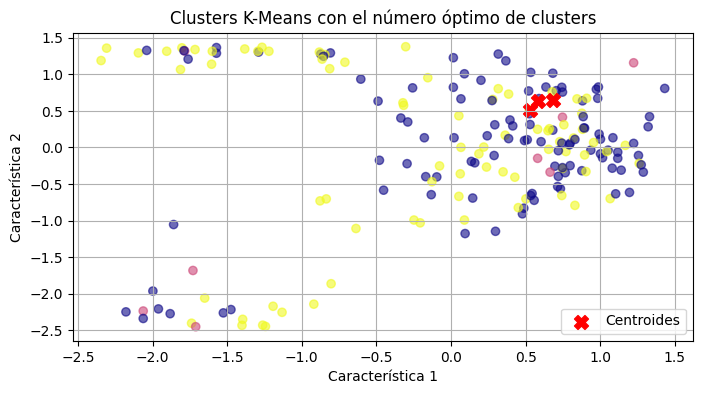

In [ ]:
# Graficar los resultados
plt.figure(figsize=(8, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma', alpha=0.6)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            s=100, c='red', marker='X', label='Centroides')
plt.title('Clusters K-Means con el número óptimo de clusters')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
# Número de clusters
k = 3

In [ ]:
# Clustering con MacQueen (KMeans)
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
# Clustering con Ward (Hierarchical)
ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_ward = ward.fit_predict(X_scaled)

In [ ]:
# Función para imprimir métricas
def print_scores(name, X, labels):
    print(f"\n🔍 Resultados para {name}:")
    print("Silhouette Score:         ", round(silhouette_score(X, labels), 3))
    print("Calinski-Harabasz Score:  ", round(calinski_harabasz_score(X, labels), 3))
    print("Davies-Bouldin Score:     ", round(davies_bouldin_score(X, labels), 3))

print_scores("KMeans (MacQueen)", X_scaled, labels_kmeans)
print_scores("Hierarchical (Ward)", X_scaled, labels_ward)


🔍 Resultados para KMeans (MacQueen):
Silhouette Score:          0.175
Calinski-Harabasz Score:   47.159
Davies-Bouldin Score:      1.965

🔍 Resultados para Hierarchical (Ward):
Silhouette Score:          0.199
Calinski-Harabasz Score:   45.353
Davies-Bouldin Score:      1.769


In [ ]:
# Visualización 2D con PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

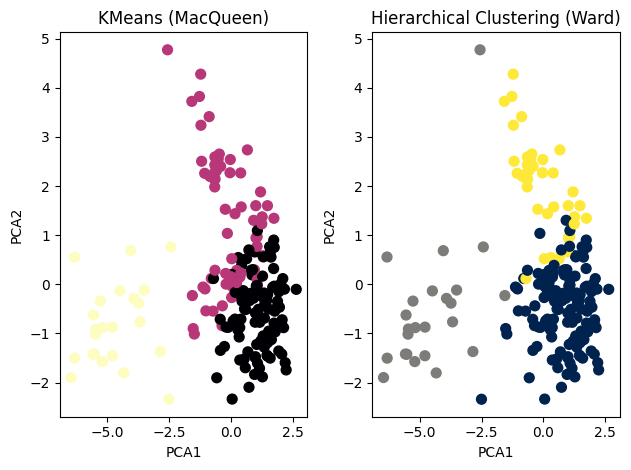

In [ ]:
# KMeans
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='magma', s=50)
plt.title('KMeans (MacQueen)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Ward
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_ward, cmap='cividis', s=50)
plt.title('Hierarchical Clustering (Ward)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

## 2.2 DBSCAN

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [ ]:
# Estandarizar los datos
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)  # Ajusta eps y min_samples según sea necesario
labels = dbscan.fit_predict(X_scaled)
dbscan

DBSCAN(eps=1, min_samples=3)

In [ ]:

# Graficar los resultados
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

<Figure size 800x600 with 0 Axes>

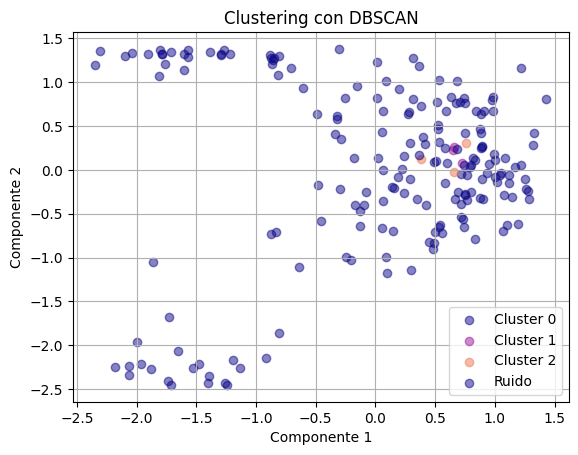

In [ ]:
# Asignar colores a cada cluster
colors = plt.cm.get_cmap('plasma', len(unique_labels))

for k in unique_labels:
    class_member_mask = (labels == k)

    # Graficar los puntos del cluster
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=colors(k), label=f'Cluster {k}' if k != -1 else 'Ruido', alpha=0.5)

# Etiquetas y título
plt.title('Clustering con DBSCAN')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid()
plt.show()

## 2.3 Cluster jerarquico

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Aplicar el enlace jerárquico
linked = linkage(X_scaled, method='weighted')

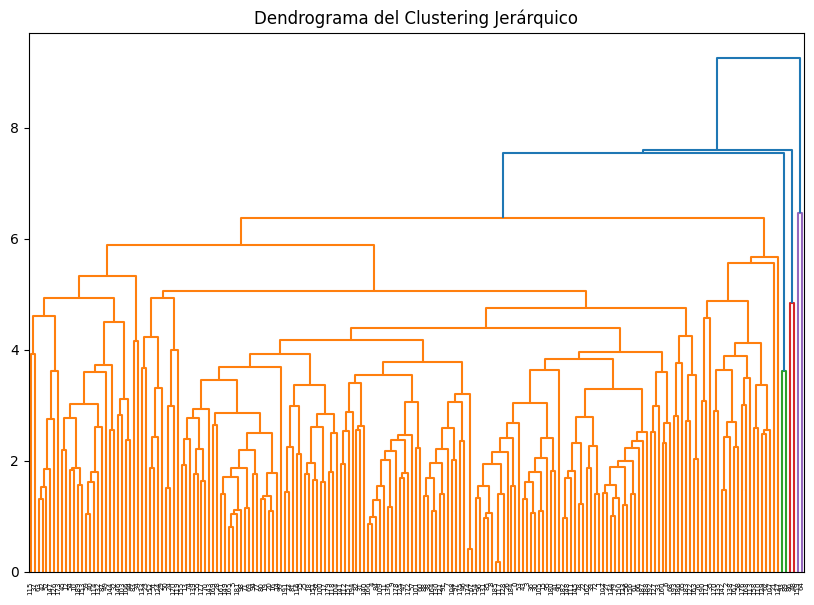

In [ ]:
# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico')
#plt.xlabel('Especies')
#plt.ylabel('Distancia')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
# Establecer un umbral para cortar el dendrograma y obtener los clusters
threshold = 2  # Ajusta según el dendrograma
clusters = fcluster(linked, threshold, criterion='distance')

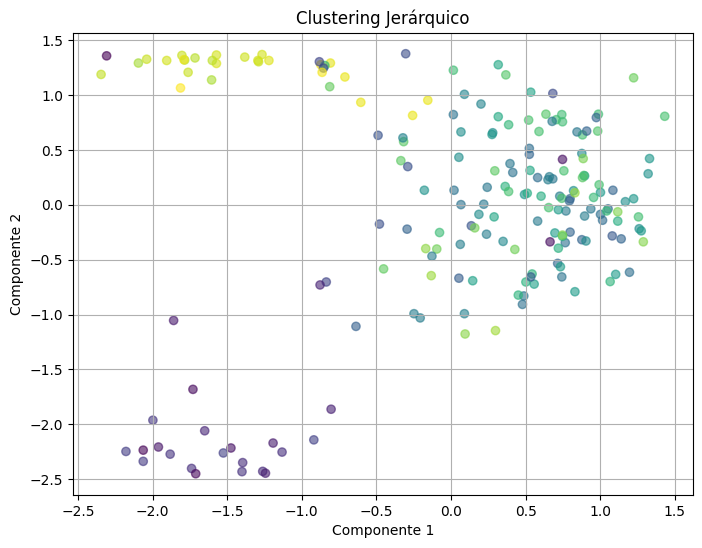

In [ ]:
# Visualizar los clusters obtenidos
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Clustering Jerárquico')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

## 3. Evaluar cluster

### 3.1 Silhouette score

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Aplicar KMeans para agrupar los datos
n_clusters = 3  # Número de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)


In [ ]:
# Calcular el coeficiente de silueta
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

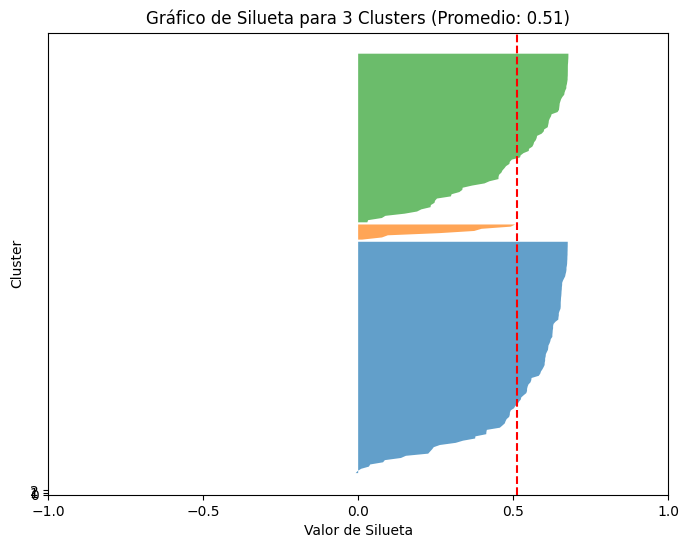

In [ ]:
# Crear el gráfico de silueta
plt.figure(figsize=(8, 6))
y_lower = 10  # Para posicionar el gráfico
for i in range(n_clusters):
    # Encuentra los valores de silueta para el cluster actual
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    # Determinar el tamaño del cluster
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]

    # Colocar el valor de silueta para el cluster actual
    plt.fill_betweenx(
        range(y_lower, y_lower + size_cluster_i),
        0,
        ith_cluster_silhouette_vals,
        alpha=0.7
    )

    # Marcar la posición del siguiente cluster
    y_lower += size_cluster_i

# Añadir detalles al gráfico
plt.title(f'Gráfico de Silueta para {n_clusters} Clusters (Promedio: {silhouette_avg:.2f})')
plt.xlabel('Valor de Silueta')
plt.ylabel('Cluster')
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.yticks(range(n_clusters))
plt.xticks([-1, -0.5, 0, 0.5, 1])
plt.xlim(-1, 1)
plt.show()

### 3.2 índice de Rand ajustado

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
true_labels = y  # Etiquetas verdaderas

In [ ]:
# Calcular el índice de Rand ajustado
ari = adjusted_rand_score(true_labels, cluster_labels)

print(f"Índice de Rand Ajustado: {ari:.4f}")

Índice de Rand Ajustado: 0.3132
